In [1]:
import sys
sys.path.append('..')
from polymarket_data import download_polymarket_prices_by_slug
from polymarket_data import get_all_closed_markets
import pandas as pd

from datetime import datetime
import ast
import sys
import polymarket_data
import plotly.express as px
!{sys.executable} -m pip install pyarrow
    # market_slug="presidential-election-winner-2024",

In [2]:
# Download data using market slug instead of token ID
df_market = download_polymarket_prices_by_slug(
    market_slug="fed-rate-hike-in-2025",
    outcome_index=0,  # 0 = first outcome (e.g., "Yes"), 1 = second outcome (e.g., "No")
    start_date=datetime(2025, 1, 1),
    end_date=datetime(2025, 2, 1),
    fidelity=10,
    overwrite=True
)

Market: Fed rate hike in 2025?
Date range (31 days) exceeds API limit (14 days)
Splitting into 3 chunks...
  Token ID: 60487116984468020978247225474488...
  Date range: 2025-01-01 to 2025-01-15
  Fidelity: 10 minute(s)
Cached data saved to data/polymarket/token_6048711698446802_20250101_20250115_fid10.parquet
Downloaded 2016 data points
  Token ID: 60487116984468020978247225474488...
  Date range: 2025-01-15 to 2025-01-29
  Fidelity: 10 minute(s)
Cached data saved to data/polymarket/token_6048711698446802_20250115_20250129_fid10.parquet
Downloaded 2016 data points
  Token ID: 60487116984468020978247225474488...
  Date range: 2025-01-29 to 2025-02-01
  Fidelity: 10 minute(s)
Cached data saved to data/polymarket/token_6048711698446802_20250129_20250201_fid10.parquet
Downloaded 432 data points
Combined 3 chunks into 4464 total data points


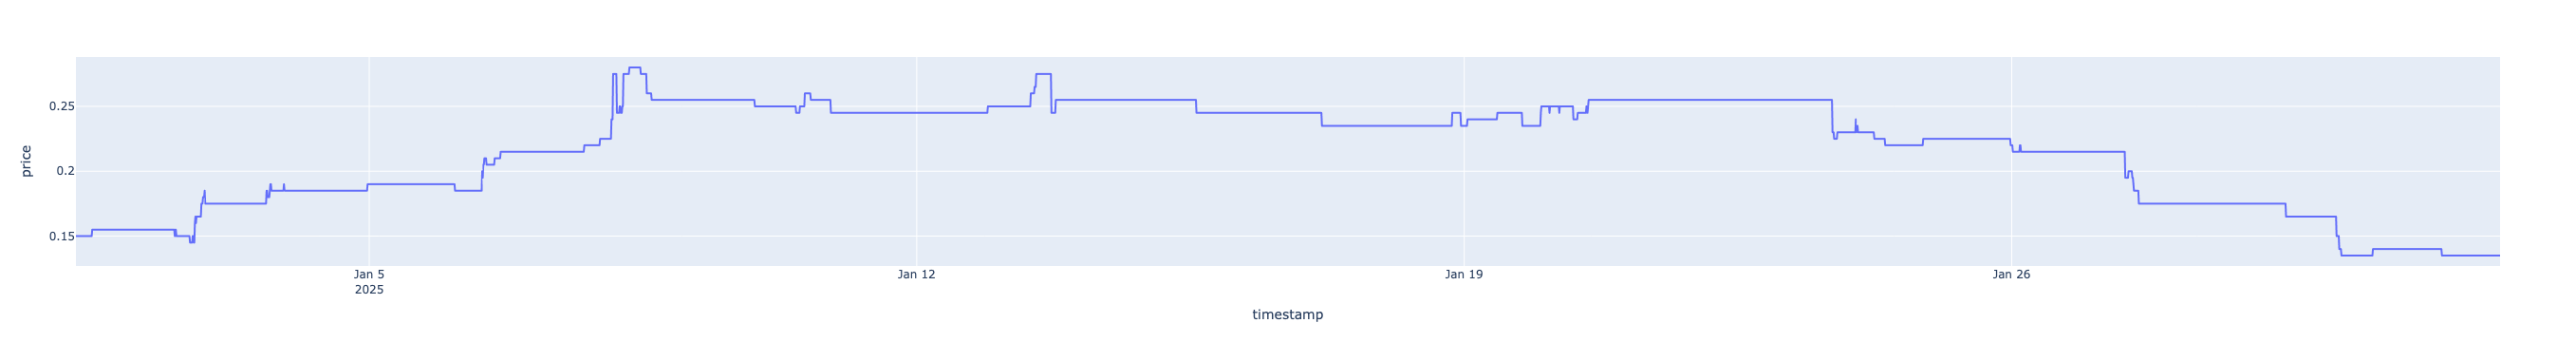

In [3]:
px.line(df_market, 'timestamp', 'price')

In [6]:


market_slug="fed-rate-hike-in-2025"
market_info = polymarket_data.get_market_info(market_slug)
outcomes = ast.literal_eval(market_info['outcomes'])
token_ids = ast.literal_eval(market_info['clobTokenIds'])

In [4]:
df = get_all_closed_markets(
    cache_dir="../data/polymarket",
    overwrite=False  # Use cached data if available
)

Loading closed markets metadata from cache: ../data/polymarket/closed_markets_metadata.parquet
Loaded 58980 closed markets from cache
  Converted 4 columns to numeric: liquidity, volume, fee, umaReward


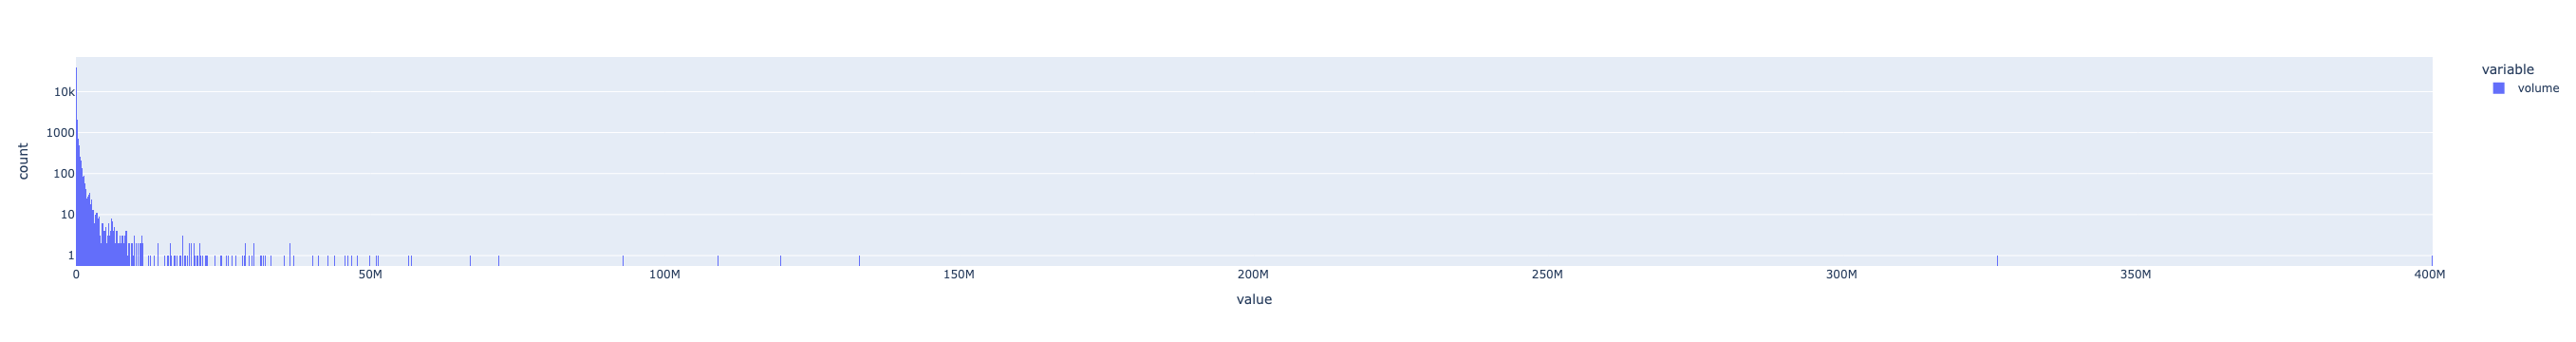

In [13]:
[x for x in df.columns if 'vol' in x or 'liq' in x]
# top10 = df.sort_values(by='volume').columns[:10]
# next10 = df.sort_values(by='volume').columns[10:20]

px.histogram(df, ['volume'], log_y=True)


In [11]:
df['question'].shape, df['question'].unique().shape

((58980,), (55120,))

In [27]:
df['slug'].shape, df['slug'].unique().shape

((58980,), (58980,))